# <center> <b> 实验三 神经网络基础实验 </b> </center>  
本实验主要研究神经网络的基本组成和基于tensorflow的神经网络构建、训练以及评价方法

## 实验目的
1. 深入学习神经网络的工作原理
2. 掌握利用tensorflow构建神经网络的方法
2. 学习掌握numpy,tensorflow等库的使用

## 实验工具
1. Anaconda, Jupyter Notebook
2. numpy, pandas,sklearn, matplotlib
3. tensorflow

## 实验内容

### 1. 搭建实验环境

构建系统需要的数据处理、绘图以及系统交互运行环境  
- 定义tensorflow环境复位函数
- 设置绘图环境
- 定义绘图产生的图像存储相关的操作

In [1]:
# 兼容支持Python2和Python3
from __future__ import division, print_function, unicode_literals

# 导入实验所需的Python库
import numpy as np
import os

# 定义TensorFlow的运行环境复位函数
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# 绘图环境设置
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 输出图像的存储目录
PROJECT_ROOT_DIR = "."         # 当前目录

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)   # 以300dpi的分辨率存储图像

### 2. 基于感知机模型做二元线性分类（单个神经元）  
感知机是最简单的神经网络模型，是一种二元分类的线性神经元模型，可用来进行二元分类。 

下面实验中将采用注明的鸢尾花(iris)花卉数据集。该数据集由Fisher收集整理而成，是常用的分类实验数据集，多重变量分析的数据集。目前已经集成在sklearn Python包的数据集中。  
数据集包含150个数据样本，分为3种类类，每个种类包含50个数据，每个数据包含4个花尺度属性：
- 花萼长度(Sepal.Length)
- 花萼宽度(Sepal.Width)
- 花瓣长度(Petal.Length)
- 花瓣宽度(Petal.Width)

以及一个种类属性，即对应的种类，有三种
- 山鸢尾(Iris Setosa)
- 杂色鸢尾(Iris Versicolour)
- 维吉尼亚鸢尾(Iris Virginica)

可以通过采集鸢尾花的4个属性来预测该花属于哪一个种类。  


In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

# 加载iris数据集
iris = load_iris()
#查看iris的描述
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
#查看iris的描述
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
# 查看鸢尾花的数据属性
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
# 查看鸢尾花数据对应的种类
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
# 从描述中可以看出花瓣长度和宽度与种类的关联度极高，因此取鸢尾花花瓣数据作为分类输入
X = iris.data[:, (2, 3)]  # 取花瓣长度和宽度两列作为输入
y = (iris.target == 0).astype(np.int)   #获取种类数据

# 利用sklearn.linear_model中的Perceptron模型作为单一神经元来进行分类
per_clf = Perceptron(max_iter=100, tol=-np.infty, random_state=42)
# 神经元拟合，类似于二元线性分类。二输入一输出模型结构
per_clf.fit(X, y)

Perceptron(max_iter=100, random_state=42, tol=-inf)

In [7]:
# 模型预测（假设有朵鸢尾花的花瓣长度是2cm，宽度是0.5cm，判断其种类)
y_pred = per_clf.predict([[2, 0.3]])
y_pred
# 预测输出结果为1，表明是山鸢尾花(Iris Setosa)

array([1])

**计算感知机得到的拟合函数模型**

In [8]:
# 导入函数显示的Latex包
from IPython.display import Latex
w1 = per_clf.coef_[0][0]
w2 = per_clf.coef_[0][1]
b = per_clf.intercept_[0]

# 显示二元分类的函数关系式，激活函数是heaviside函数，就是符号函数
Latex(r"线性分类函数为：$y=sign({0:.2f}x_1{1:+.2f}x_2{2:+.2f})$".format(w1,w2,b))

<IPython.core.display.Latex object>

Saving figure perceptron_iris_plot


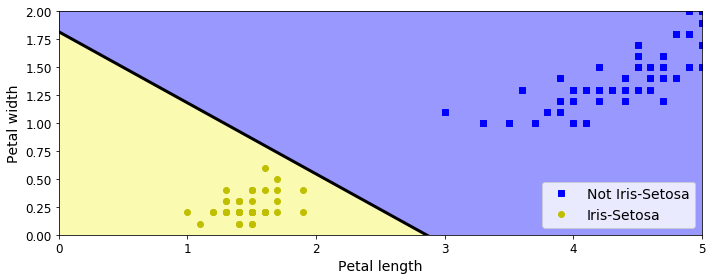

In [9]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_[0] / per_clf.coef_[0][1]

# 定义绘图坐标轴范围[xmin xmax ymin ymax]
axes = [0, 5, 0, 2]

# 定义绘图网格
x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )

# 生成输入数据，用此数据绘制曲线
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

# 绘制原始数据图iris.data和数据iris.target
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")   #蓝色正方形块(blue square)
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")       #黄色空心圆(yellow circle)

# 绘制分界线
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)

# 绘制区域颜色
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])
plt.contourf(x0, x1, zz, cmap=custom_cmap)

# 标注图形
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

# 保存图形到文件
save_fig("perceptron_iris_plot")
plt.show()

### 3. 激活函数
绘制不同的激活函数图像

In [10]:
# 经典的sigmoid函数，S型函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 注明的Relu函数
def relu(z):
    return np.maximum(0, z)

# 求导函数
def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


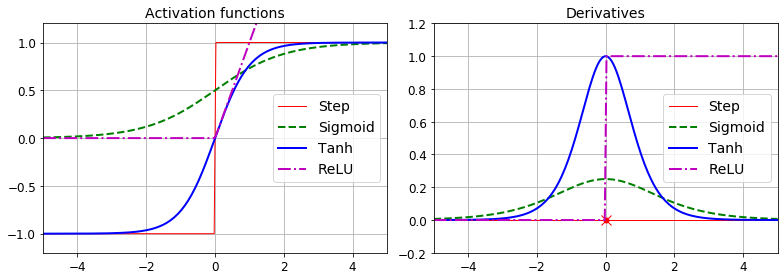

In [11]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

# 绘制激活函数
plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")       # 阶跃函数
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")   # Sigmoid函数
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")       # 双曲正切函数
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")         # ReLU函数
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

# 绘制激活函数的导数函数
plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

# 保存图像到文件
save_fig("activation_functions_plot")
plt.show()

In [12]:
# Heaviside函数，可以看成是符号函数
def heaviside(z):
    return (z >= 0).astype(z.dtype)

# 用于异或分类的多层感知机API函数
def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

In [1]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

# 采用符号函数作为激活函数进行异或分类
plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

# 采用sigmoid激活函数进行异或分类
plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

NameError: name 'np' is not defined

### 4. 用Tensorflow的神经网络架构来处理MNIST_Data手写汉字数据
这里用tensorflow自带的分类器API进行手写函数分类

In [14]:
import tensorflow as tf

**载入数据**  
这里训练集的样本数量只有55000个手写数字，测试集有10000个手写数字

In [15]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(r'./Datasets/')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./Datasets/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./Datasets/train-labels-idx1-ubyte.gz
Extracting ./Datasets/t10k-images-idx3-ubyte.gz
Extracting ./Datasets/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


**划分数据集**

In [16]:
# 训练集
#X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0   # 数据展开成60000*784的数组
#y_train = y_train.astype(np.int32)
X_train, y_train = mnist.train.next_batch(60000)
X_train = X_train.reshape(-1, 28*28)
y_train = y_train.astype(np.int32)
# 测试集
#X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0     # 数据展开成10000*784的数组

X_test, y_test = mnist.test.next_batch(10000)
X_test = X_test.reshape(-1, 28*28)# 训练集进一步划分为训练集和验证集
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [17]:
X_train.shape

(55000, 784)

**查看手写数字图像**

In [18]:
def plot_digit(some_digit):
    some_digit_image = some_digit.reshape(28,28)
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")
    plt.show()

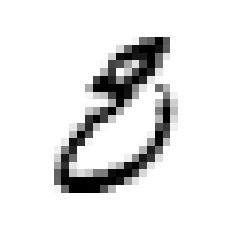

In [19]:
plot_digit(X_train[10100])

**利用tensorflow的高级API来完成网络训练**  
这里用DNNClassifier类来训练一个有两个隐藏层和一个输出层的神经网络  
- 输入层为图像特征输入层，784个特征数据，定义为X
- 第一个隐藏层有300个神经元
- 第二个隐藏层有100个神经元
- 输出层为ReLU层，有10个神经元

In [20]:
# 确定特征输入层，维度为28*28=784
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]

# 定义DNNClassifier神经网络实例，隐藏层为[300, 100], 输出层为10
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                     feature_columns=feature_cols)

# 连接并打乱训练数据组合到神经网络DNNClassifier神经网络实例，确定训练相关的参数
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)

# 开始训练
dnn_clf.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\YUYOUL~1\\AppData\\Local\\Temp\\tmp_0qf_eej', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001E08003C248>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions f

INFO:tensorflow:loss = 0.1818515, step = 4100 (0.337 sec)
INFO:tensorflow:global_step/sec: 312.359
INFO:tensorflow:loss = 4.5806184, step = 4200 (0.320 sec)
INFO:tensorflow:global_step/sec: 313.336
INFO:tensorflow:loss = 0.52348745, step = 4300 (0.319 sec)
INFO:tensorflow:global_step/sec: 263.86
INFO:tensorflow:loss = 0.9767274, step = 4400 (0.380 sec)
INFO:tensorflow:global_step/sec: 286.48
INFO:tensorflow:loss = 1.9094573, step = 4500 (0.349 sec)
INFO:tensorflow:global_step/sec: 302.01
INFO:tensorflow:loss = 6.216709, step = 4600 (0.330 sec)
INFO:tensorflow:global_step/sec: 302.923
INFO:tensorflow:loss = 0.23226652, step = 4700 (0.329 sec)
INFO:tensorflow:global_step/sec: 307.569
INFO:tensorflow:loss = 4.126733, step = 4800 (0.326 sec)
INFO:tensorflow:global_step/sec: 315.306
INFO:tensorflow:loss = 0.9832078, step = 4900 (0.317 sec)
INFO:tensorflow:global_step/sec: 311.389
INFO:tensorflow:loss = 2.259443, step = 5000 (0.321 sec)
INFO:tensorflow:global_step/sec: 305.692
INFO:tensorflo

INFO:tensorflow:global_step/sec: 307.568
INFO:tensorflow:loss = 0.32680467, step = 12400 (0.324 sec)
INFO:tensorflow:global_step/sec: 312.359
INFO:tensorflow:loss = 0.09333568, step = 12500 (0.321 sec)
INFO:tensorflow:global_step/sec: 299.306
INFO:tensorflow:loss = 0.27611837, step = 12600 (0.333 sec)
INFO:tensorflow:global_step/sec: 308.515
INFO:tensorflow:loss = 0.101315886, step = 12700 (0.326 sec)
INFO:tensorflow:global_step/sec: 319.324
INFO:tensorflow:loss = 0.009875511, step = 12800 (0.313 sec)
INFO:tensorflow:global_step/sec: 311.389
INFO:tensorflow:loss = 0.062605605, step = 12900 (0.320 sec)
INFO:tensorflow:global_step/sec: 295.774
INFO:tensorflow:loss = 0.08871859, step = 13000 (0.338 sec)
INFO:tensorflow:global_step/sec: 312.358
INFO:tensorflow:loss = 1.6740884, step = 13100 (0.320 sec)
INFO:tensorflow:global_step/sec: 270.992
INFO:tensorflow:loss = 0.02307045, step = 13200 (0.370 sec)
INFO:tensorflow:global_step/sec: 246.965
INFO:tensorflow:loss = 0.09087373, step = 13300 

INFO:tensorflow:global_step/sec: 249.422
INFO:tensorflow:loss = 0.012441481, step = 20500 (0.400 sec)
INFO:tensorflow:global_step/sec: 295.774
INFO:tensorflow:loss = 0.08160896, step = 20600 (0.337 sec)
INFO:tensorflow:global_step/sec: 315.306
INFO:tensorflow:loss = 0.10138826, step = 20700 (0.318 sec)
INFO:tensorflow:global_step/sec: 272.467
INFO:tensorflow:loss = 0.04197609, step = 20800 (0.366 sec)
INFO:tensorflow:global_step/sec: 279.296
INFO:tensorflow:loss = 0.029109173, step = 20900 (0.358 sec)
INFO:tensorflow:global_step/sec: 319.323
INFO:tensorflow:loss = 0.011895202, step = 21000 (0.313 sec)
INFO:tensorflow:global_step/sec: 297.53
INFO:tensorflow:loss = 0.02208858, step = 21100 (0.336 sec)
INFO:tensorflow:global_step/sec: 295.773
INFO:tensorflow:loss = 0.20292747, step = 21200 (0.338 sec)
INFO:tensorflow:global_step/sec: 284.044
INFO:tensorflow:loss = 0.061496228, step = 21300 (0.353 sec)
INFO:tensorflow:global_step/sec: 258.421
INFO:tensorflow:loss = 0.038133908, step = 2140

INFO:tensorflow:global_step/sec: 205.889
INFO:tensorflow:loss = 0.08819382, step = 28600 (0.485 sec)
INFO:tensorflow:global_step/sec: 239.301
INFO:tensorflow:loss = 0.048023798, step = 28700 (0.417 sec)
INFO:tensorflow:global_step/sec: 288.125
INFO:tensorflow:loss = 0.038573023, step = 28800 (0.347 sec)
INFO:tensorflow:global_step/sec: 304.763
INFO:tensorflow:loss = 0.016193543, step = 28900 (0.328 sec)
INFO:tensorflow:global_step/sec: 272.465
INFO:tensorflow:loss = 0.04748364, step = 29000 (0.368 sec)
INFO:tensorflow:global_step/sec: 243.368
INFO:tensorflow:loss = 0.06358857, step = 29100 (0.410 sec)
INFO:tensorflow:global_step/sec: 241.608
INFO:tensorflow:loss = 0.12615618, step = 29200 (0.414 sec)
INFO:tensorflow:global_step/sec: 277.749
INFO:tensorflow:loss = 0.01220764, step = 29300 (0.360 sec)
INFO:tensorflow:global_step/sec: 251.296
INFO:tensorflow:loss = 0.018017592, step = 29400 (0.398 sec)
INFO:tensorflow:global_step/sec: 255.784
INFO:tensorflow:loss = 0.03988134, step = 2950

INFO:tensorflow:global_step/sec: 263.862
INFO:tensorflow:loss = 0.011717941, step = 36700 (0.379 sec)
INFO:tensorflow:global_step/sec: 242.192
INFO:tensorflow:loss = 0.008927538, step = 36800 (0.413 sec)
INFO:tensorflow:global_step/sec: 241.027
INFO:tensorflow:loss = 0.077442065, step = 36900 (0.416 sec)
INFO:tensorflow:global_step/sec: 254.486
INFO:tensorflow:loss = 0.0012841622, step = 37000 (0.394 sec)
INFO:tensorflow:global_step/sec: 252.562
INFO:tensorflow:loss = 0.0015330387, step = 37100 (0.394 sec)
INFO:tensorflow:global_step/sec: 272.467
INFO:tensorflow:loss = 0.021154895, step = 37200 (0.367 sec)
INFO:tensorflow:global_step/sec: 261.794
INFO:tensorflow:loss = 0.0131307505, step = 37300 (0.382 sec)
INFO:tensorflow:global_step/sec: 259.089
INFO:tensorflow:loss = 0.0037401957, step = 37400 (0.385 sec)
INFO:tensorflow:global_step/sec: 276.216
INFO:tensorflow:loss = 0.024598712, step = 37500 (0.363 sec)
INFO:tensorflow:global_step/sec: 272.468
INFO:tensorflow:loss = 0.008818343, s

**评估测试结果**

In [21]:
# 连接测试集数据（此时不打乱数据）到神经网络DNNClassifier神经网络实例，确定训练相关的参数
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-12-02T10:32:41Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\YUYOUL~1\AppData\Local\Temp\tmp_0qf_eej\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-12-02-10:32:41
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9803, average_loss = 0.10879131, global_step = 44000, loss = 13.771051
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 44000: C:\Users\YUYOUL~1\AppData\Local\Temp\tmp_0qf_eej\model.ckpt-44000


In [22]:
#输出评价指标（精度、平均损失，总损失，迭代步数）
eval_results

{'accuracy': 0.9803,
 'average_loss': 0.10879131,
 'loss': 13.771051,
 'global_step': 44000}

In [23]:
# 用测试集数据进行预测
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\YUYOUL~1\AppData\Local\Temp\tmp_0qf_eej\model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'logits': array([ 19.667513  , -10.836205  ,   2.858003  , -11.803219  ,
        -14.176632  ,  -4.893322  ,   0.19173141,  -5.046512  ,
         -5.7533736 ,  -5.272672  ], dtype=float32),
 'probabilities': array([1.0000000e+00, 5.6546253e-14, 5.0086751e-08, 2.1499821e-14,
        2.0029670e-15, 2.1545914e-11, 3.4815701e-09, 1.8485666e-11,
        9.1169390e-12, 1.4743989e-11], dtype=float32),
 'class_ids': array([0], dtype=int64),
 'classes': array([b'0'], dtype=object),
 'all_class_ids': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'all_classes': array([b'0', b'1', b'2', b'3', b'4', b'5', b'6', b'7', b'8', b'9'],
       dtype=object)}

### 5. 自己构建TensorFlow架构来完成手写数字识别
这里采用自己编写tensorflow计算图方式来完成tensorflow的手写数字识别过程
#### 5.1 定义网络参数

In [24]:
import tensorflow as tf
# 定义神经网络结构擦书
n_inputs = 28*28  # 输入层神经元个数
n_hidden1 = 300   # 第一个隐藏层神经元个数
n_hidden2 = 100   # 第二个隐藏层神经元个数
n_outputs = 10    # 输出层神经元个数(因为输出10个手写数字，此处为10)

In [25]:
# 复位tensorflow计算图
reset_graph()

# 利用placeholder设置数据输入输出映射
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

#### 5.2 构建计算图
**定义神经网络结构中的每一层** 

In [26]:
# 定义每一层神经元
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):                           # 定义一个作用域。这样可以用tensorboard来查看网络结构
        n_inputs = int(X.get_shape()[1])                # 利用输入的维度来确定输入层的神经元个数
        
        # 定义权重矩阵W，以及权重矩阵的初始化方式
        stddev = 2 / np.sqrt(n_inputs)                  # 权重矩阵的方差
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)   # 高斯正态分布的权重取值
        W = tf.Variable(init, name="kernel")            # 初始化权重矩阵，此处定义为tf.Variable。说明是网络优化的参数
        
        # 初始化偏差值
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")   # 初始化偏差值为0，此处定义为tf.Variable。说明是网络优化的参数
        
        # 构建该层神经网络的计算方式
        Z = tf.matmul(X, W) + b
        
        # 判断该层是否需要激活函数，需要就使用激活函数进行数值转换，不需要就直接输出
        if activation is not None:
            return activation(Z)
        else:
            return Z

**通过设置每层参数，并连接各层，从而构建神经网络** 

In [27]:
with tf.name_scope("dnn"):
    # 输入层到第一个隐藏层
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    # 第一个隐藏层到第二个隐藏层
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    # 第二个隐藏层到输出层
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

**完成神经网络定义后，需要明确损失函数，以便于网络依据损失函数来训练网络**  
此处采用交叉熵函数来定义神经网络，真实的输出为y，网络输出为 $\hat{y}=$logits  
损失函数（交叉熵）为 $J=-(ylog\hat{y}+(1-y)log(1-\hat{y})$

In [28]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

**确定训练节点**

In [29]:
# 学习率为0.01
learning_rate = 0.01

# 采用梯度下降法训练网络
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)    # 选择梯度下降优化器
    training_op = optimizer.minimize(loss)                          # 以损失函数为目标进行优化

**如何评价网络，确定评估节点**

In [30]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

**定义初始化参数节点，初始化tf.Variable的值，就是权重W和偏差b**

In [31]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()           # 保存初始化参数

#### 5.3 开始训练神经网络，执行计算图

In [32]:
n_epochs = 40         # 迭代参数
batch_size = 50       # 批处理参数

**打乱数据**

In [33]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

**创建tensorflow会话进程，开始训练**

In [34]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.86 Val accuracy: 0.9136
1 Batch accuracy: 0.82 Val accuracy: 0.9304
2 Batch accuracy: 0.94 Val accuracy: 0.9342
3 Batch accuracy: 0.92 Val accuracy: 0.945
4 Batch accuracy: 0.98 Val accuracy: 0.9472
5 Batch accuracy: 0.94 Val accuracy: 0.9538
6 Batch accuracy: 1.0 Val accuracy: 0.955
7 Batch accuracy: 0.98 Val accuracy: 0.958
8 Batch accuracy: 0.98 Val accuracy: 0.9608
9 Batch accuracy: 0.96 Val accuracy: 0.9644
10 Batch accuracy: 0.96 Val accuracy: 0.9652
11 Batch accuracy: 0.98 Val accuracy: 0.9656
12 Batch accuracy: 1.0 Val accuracy: 0.9654
13 Batch accuracy: 0.98 Val accuracy: 0.9666
14 Batch accuracy: 1.0 Val accuracy: 0.9682
15 Batch accuracy: 0.98 Val accuracy: 0.9694
16 Batch accuracy: 0.98 Val accuracy: 0.9676
17 Batch accuracy: 1.0 Val accuracy: 0.9696
18 Batch accuracy: 0.98 Val accuracy: 0.9708
19 Batch accuracy: 0.98 Val accuracy: 0.9702
20 Batch accuracy: 1.0 Val accuracy: 0.9728
21 Batch accuracy: 0.96 Val accuracy: 0.9728
22 Batch accuracy: 1.0 Val a

#### 5.4 分析结果
**存储训练结果**

In [35]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


**预测结果和实际结果对比**

In [36]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", y_test[:20])

Predicted classes: [0 1 7 1 3 2 2 1 4 7 1 6 6 8 3 8 1 7 9 1]
Actual classes:    [0 1 7 1 3 2 2 1 4 7 1 6 6 8 3 8 1 7 9 1]


### 6. 用全连接网络API来构建神经网络
tensorflow的API中全连接网络采用功能强大的dense()函数，可以用这个函数来代替上面的neuron_layer()函数。

In [37]:
n_inputs = 28*28 
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [38]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y") 

**此处直接采用dense()函数构建神经网络**

In [39]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits)

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


In [40]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [41]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [42]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [43]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [44]:
n_epochs = 20
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.84 Validation accuracy: 0.905
1 Batch accuracy: 0.84 Validation accuracy: 0.9226
2 Batch accuracy: 0.94 Validation accuracy: 0.9268
3 Batch accuracy: 0.92 Validation accuracy: 0.9384
4 Batch accuracy: 0.98 Validation accuracy: 0.945
5 Batch accuracy: 0.92 Validation accuracy: 0.9488
6 Batch accuracy: 1.0 Validation accuracy: 0.9518
7 Batch accuracy: 0.98 Validation accuracy: 0.9542
8 Batch accuracy: 1.0 Validation accuracy: 0.9572
9 Batch accuracy: 0.94 Validation accuracy: 0.9604
10 Batch accuracy: 0.96 Validation accuracy: 0.9616
11 Batch accuracy: 0.98 Validation accuracy: 0.9612
12 Batch accuracy: 1.0 Validation accuracy: 0.9634
13 Batch accuracy: 0.96 Validation accuracy: 0.9644
14 Batch accuracy: 1.0 Validation accuracy: 0.9662
15 Batch accuracy: 0.98 Validation accuracy: 0.967
16 Batch accuracy: 0.96 Validation accuracy: 0.9662
17 Batch accuracy: 1.0 Validation accuracy: 0.9694
18 Batch accuracy: 1.0 Validation accuracy: 0.9704
19 Batch accuracy: 0.98 Validat

### 6. 实验作业
1. 写出三种不同激活函数，并阐述其优缺点。  
答：

2. 解释反向传播的工作机制。
3. 列出第5项实验的全部超参数
4. 试着绘制神经网络经过训练后用于任意指定手写数字图像的输出识别结果（可选）